# Filter

![titlle](1.png)

![title](2.png)

![title](3.png)

![title](4.png)

# Impulse Response
Импульсная характеристика

![title](5.png)

A given filter also has a time domain representation; it’s called the “impulse response” of the filter because it is what you see in the time domain if you take an impulse and put it through the filter. For a FIR type filter, the impulse response is simply the taps themselves.
如果采取脉冲并将其通过滤波器，滤波器的时域表示就是滤波器的脉冲响应。对于FIR型滤波器，脉冲响应就是抽头本身。

# Frequency Response
Частотная характеристика

![title](6.png)

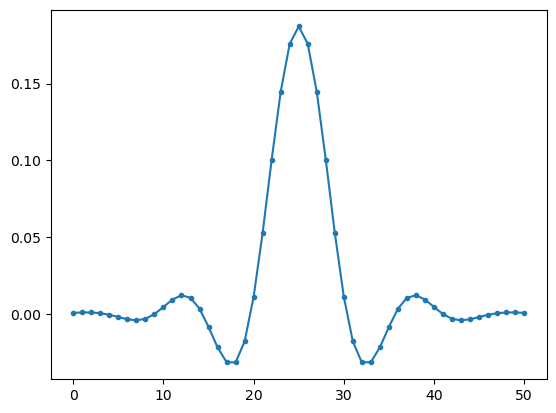

In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

num_taps = 51 # it helps to use an odd number of taps
cut_off = 3000 # Hz
sample_rate = 32000 # Hz

# create our low pass filter
h = signal.firwin(num_taps, cut_off, nyq=sample_rate/2)

# plot the impulse response
plt.plot(h, '.-')
plt.show()

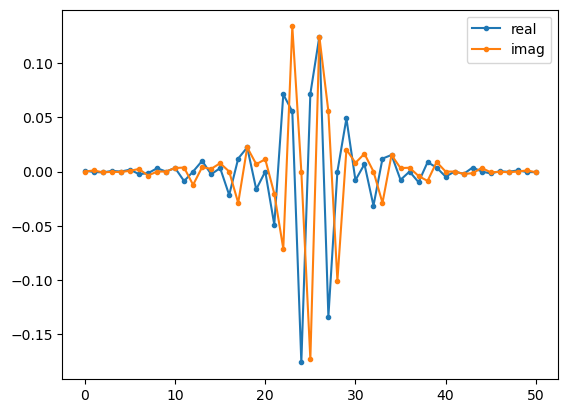

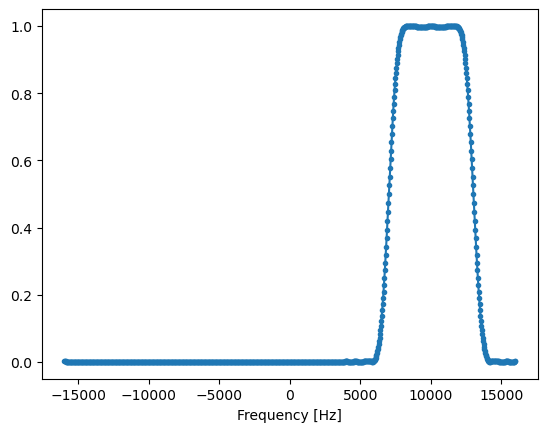

In [3]:
# (h was found using the first code snippet)

# Shift the filter in frequency by multiplying by exp(j*2*pi*f0*t)
f0 = 10e3 # amount we will shift
Ts = 1.0/sample_rate # sample period
t = np.arange(0.0, Ts*len(h), Ts) # time vector. args are (start, stop, step)
exponential = np.exp(2j*np.pi*f0*t) # this is essentially a complex sine wave

h_band_pass = h * exponential # do the shift

# plot impulse response
plt.figure('impulse')
plt.plot(np.real(h_band_pass), '.-')
plt.plot(np.imag(h_band_pass), '.-')
plt.legend(['real', 'imag'], loc=1)

# plot the frequency response
H = np.abs(np.fft.fft(h_band_pass, 1024)) # take the 1024-point FFT and magnitude
H = np.fft.fftshift(H) # make 0 Hz in the center
w = np.linspace(-sample_rate/2, sample_rate/2, len(H)) # x axis
plt.figure('freq')
plt.plot(w, H, '.-')
plt.xlabel('Frequency [Hz]')
plt.show()

# Group Delay

![title](7.png)

As it has been observed an N tap symmetric FIR filter delayed an input tone by N/2 samples. This delay is
independent of the frequency of the input tone f. Therefore, the delay introduced by this filter is constant for all
frequencies. This delay is often referred to as group delay. Hence, we can say that a symmetric FIR filter has
constant group delay.
N抽头对称FIR滤波器将输入音延迟了N/2个采样，该延迟与输入音的频率f无关，因此，这种滤波器引入的延迟对所有频率有效。这种延迟被称作“群延迟”。因此，可以认为对称FIR滤波器具有恒定的群延迟。

Group delay is also defined as the derivative of the phase filter phase response. Therefore, if the group delay
is constant, the phase response must necessarily be linear. Thus, we can say that a filter with linear phase
delays all input frequency component by the same amount. In other words, it has a constant group delay.
群延迟也定义为相位滤波器相位响应的导数。因此，如果群延迟恒定，相位响应就必然是线性的。因此，可以说具有线性响应的滤波器将所有输入频率分量延迟相同的量。即具有恒定延迟。

Simply plotting this array of floats gives us the filter’s impulse response:



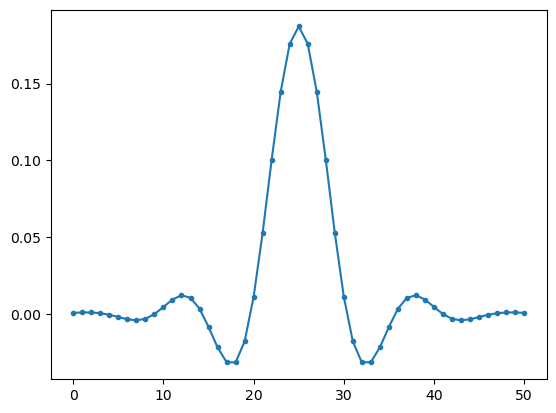

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

num_taps = 51 # it helps to use an odd number of taps
cut_off = 3000 # Hz
sample_rate = 32000 # Hz

# create our low pass filter
h = signal.firwin(num_taps, cut_off, nyq=sample_rate/2)

# plot the impulse response
plt.plot(h, '.-')
plt.show()

Real vs. Complex Filters
The filter I showed you had real taps, but taps can also be complex. Whether the taps are real or complex doesn’t have to match the signal you put through it, i.e., you can put a complex signal through a filter with real taps and vice versa. When the taps are real, the filter’s frequency response will be symmetrical around DC (0 Hz). Typically we use complex taps when we need asymmetry, which does not happen too often.

In [4]:
%%html
<img src="https://pysdr.org/_images/complex_taps.png">

The plots of the impulse response and frequency response are shown below:

In [5]:
# (h was found using the first code snippet)

# Shift the filter in frequency by multiplying by exp(j*2*pi*f0*t)
f0 = 10e3 # amount we will shift
Ts = 1.0/sample_rate # sample period
t = np.arange(0.0, Ts*len(h), Ts) # time vector. args are (start, stop, step)
exponential = np.exp(2j*np.pi*f0*t) # this is essentially a complex sine wave

h_band_pass = h * exponential # do the shift

# plot impulse response
plt.figure('impulse')
plt.plot(np.real(h_band_pass), '.-')
plt.plot(np.imag(h_band_pass), '.-')
plt.legend(['real', 'imag'], loc=1)

# plot the frequency response
H = np.abs(np.fft.fft(h_band_pass, 1024)) # take the 1024-point FFT and magnitude
H = np.fft.fftshift(H) # make 0 Hz in the center
w = np.linspace(-sample_rate/2, sample_rate/2, len(H)) # x axis
plt.figure('freq')
plt.plot(w, H, '.-')
plt.xlabel('Frequency [Hz]')
plt.show()

NameError: name 'sample_rate' is not defined

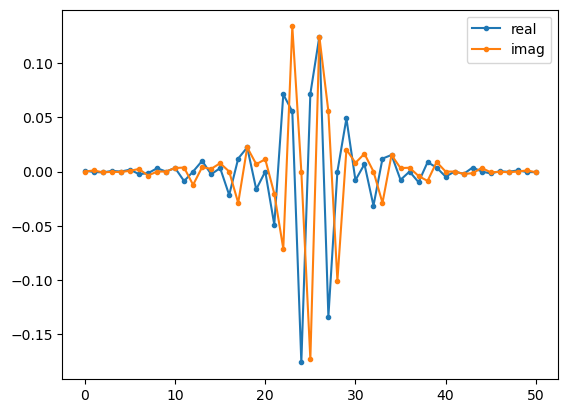

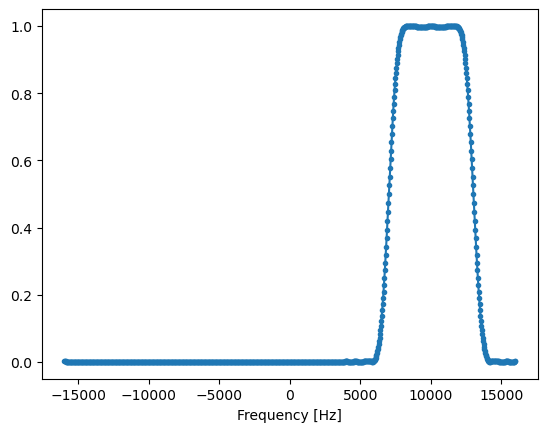

In [3]:
# (h was found using the first code snippet)

# Shift the filter in frequency by multiplying by exp(j*2*pi*f0*t)
f0 = 10e3 # amount we will shift
Ts = 1.0/sample_rate # sample period
t = np.arange(0.0, Ts*len(h), Ts) # time vector. args are (start, stop, step)
exponential = np.exp(2j*np.pi*f0*t) # this is essentially a complex sine wave

h_band_pass = h * exponential # do the shift

# plot impulse response
plt.figure('impulse')
plt.plot(np.real(h_band_pass), '.-')
plt.plot(np.imag(h_band_pass), '.-')
plt.legend(['real', 'imag'], loc=1)

# plot the frequency response
H = np.abs(np.fft.fft(h_band_pass, 1024)) # take the 1024-point FFT and magnitude
H = np.fft.fftshift(H) # make 0 Hz in the center
w = np.linspace(-sample_rate/2, sample_rate/2, len(H)) # x axis
plt.figure('freq')
plt.plot(w, H, '.-')
plt.xlabel('Frequency [Hz]')
plt.show()

# Filter Design in Python

You start by creating a vector of your desired frequency response. Let’s design an arbitrarily shaped low-pass filter shown below:
创建所需频率响应的矢量。设计一个形状任意的低通滤波器

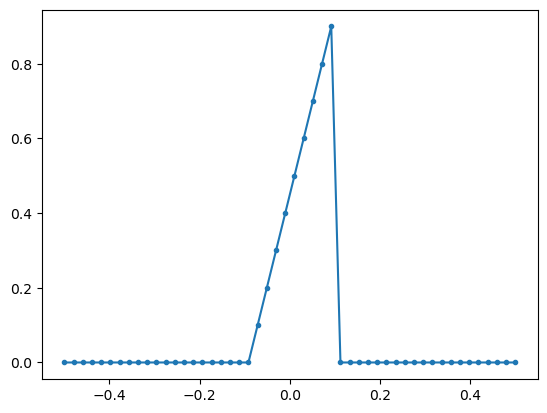

In [4]:
import numpy as np
import matplotlib.pyplot as plt
H = np.hstack((np.zeros(20), np.arange(10)/10, np.zeros(20)))
w = np.linspace(-0.5, 0.5, 50)
plt.plot(w, H, '.-')
plt.show()

hstack() is one way to concatenate arrays in numpy.

always should FFTshift after an FFT and IFFshift after an IFFT

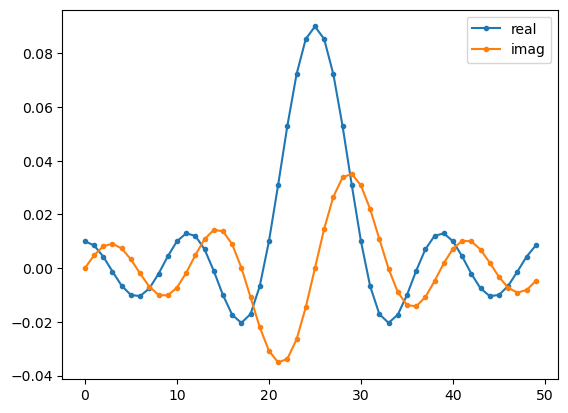

In [6]:
import numpy as np
import matplotlib.pyplot as plt
H = np.hstack((np.zeros(20), np.arange(10)/10, np.zeros(20)))
w = np.linspace(-0.5, 0.5, 50)
h = np.fft.ifftshift(np.fft.ifft(np.fft.ifftshift(H)))
plt.plot(np.real(h),'.-')
plt.plot(np.imag(h),'.-')
plt.legend(['real','imag'], loc=1)
plt.show()

We will use these taps shown above as our filter. We know that the impulse response is plotting the taps, so what we see above is our impulse response. Let’s take the FFT of our taps to see what the frequency domain actually looks like. We will do a 1,024 point FFT to get a high resolution:
我们将使用上面显示的这些水龙头作为我们的过滤器。我们知道脉冲响应正在绘制抽头，所以我们在上面看到的是我们的脉冲响应。让我们使用抽头的 FFT 来查看频域的实际情况。我们将进行 1,024 点 FFT 以获得高分辨率：

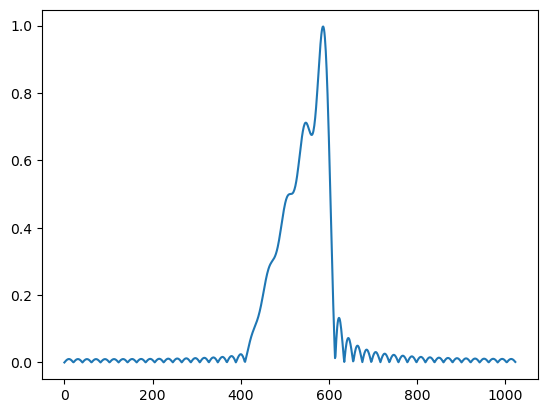

In [7]:
import numpy as np
import matplotlib.pyplot as plt
H = np.hstack((np.zeros(20), np.arange(10)/10, np.zeros(20)))
H_fft = np.fft.fftshift(np.abs(np.fft.fft(h, 1024)))
plt.plot(H_fft)
plt.show()

See how the frequency response not very straight… it doesn’t match our original very well, if you recall the shape that we initially wanted to make a filter for. A big reason is because our impulse response isn’t done decaying, i.e., the left and right sides don’t reach zero. We have two options that will allow it to decay to zero:
看看频率响应如何不是很直……如果您还记得我们最初想要为其制作滤波器的形状，它与我们的原始形状不太匹配。一个很大的原因是因为我们的脉冲响应没有衰减，即左侧和右侧没有达到零。我们有两个选项可以让它衰减到零：

Option 1: We “window” our current impulse response so that it decays to 0 on both sides. It involves multiplying our impulse response with a “windowing function” that starts and ends at zero.
选项 1：我们将当前的脉冲响应“加窗”，使其在两侧都衰减为 0。它涉及将我们的脉冲响应与开始和结束于零的“窗口函数”相乘。

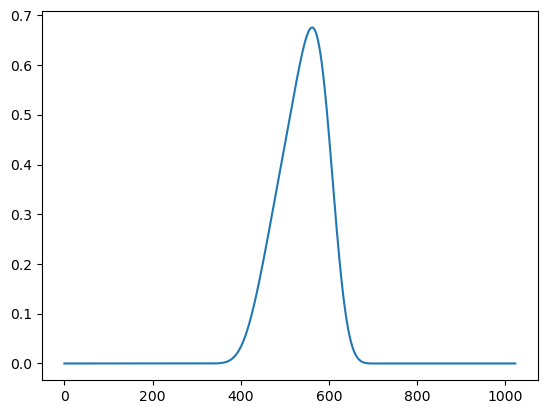

In [11]:
# After creating h using the previous code, create and apply the window
window = np.hamming(len(h))
h = h * window
H_fft = np.fft.fftshift(np.abs(np.fft.fft(h, 1024)))
plt.plot(H_fft)
plt.show()

Option 2: We re-generate our impulse response using more points so that it has time to decay. We need to add resolution to our original frequency domain array (called interpolating).
选项 2：我们使用更多点重新生成脉冲响应，以便它有时间衰减。我们需要为我们的原始频域阵列添加分辨率（称为插值）。

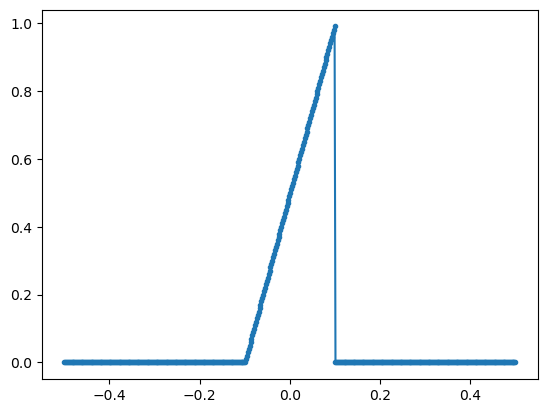

In [14]:
H = np.hstack((np.zeros(200), np.arange(100)/100, np.zeros(200)))
w = np.linspace(-0.5, 0.5, 500)
plt.plot(w, H, '.-')
plt.show()
# (the rest of the code is the same)

Intro to Pulse Shaping

We use filters to craft the “shape” of our symbols because the shape in the time domain changes the shape in the frequency domain. The frequency domain informs us how much spectrum/bandwidth our signal will use, and we usually want to minimize it. What is important to understand is that the spectral characteristics (frequency domain) of the baseband symbols do not change when we modulate a carrier; it just shifts the baseband up in frequency while the shape stays the same, which means the amount of bandwidth it uses stays the same. When we use 1 sample per symbol, it’s like transmitting square pulses. In fact BPSK using 1 sample per symbol is just a square wave of random 1’s and -1’s:

In [15]:
%%html
<img src="https://pysdr.org/_images/bpsk.svg">

And as we have learned, square pulses are not efficient because they use an excess amount of spectrum:

In [16]:
%%html
<img src="https://pysdr.org/_images/square-wave.svg">

So what we do is we “pulse shape” these blocky-looking symbols so that they take up less bandwidth in the frequency domain. We “pulse shape” by using a low-pass filter because it discards the higher frequency components of our symbols. Below shows an example of symbols in the time (top) and frequency (bottom) domain, before and after a pulse-shaping filter has been applied:

In [18]:
%%html
<img src="https://pysdr.org/_images/pulse_shaping.png">

In [19]:
%%html
<img src="https://pysdr.org/_images/pulse_shaping_freq.png">

Note how much quicker the signal drops off in frequency. The sidelobes are ~30 dB lower after pulse shaping; that’s 1,000x less! And more importantly, the main lobe is narrower, so less spectrum is used for the same amount of bits per second.

Below demonstrates the time and frequency domain of a raised-cosine filter with different values of \beta, the parameter that defines how steep the roll-off is.

In [20]:
%%html
<img src="https://pysdr.org/_images/pulse_shaping_rolloff.png">

You can see that a lower value of \beta reduces the spectrum used (for the same amount of data). However, if the value is too low then the time domain symbols take longer to decay to zero. Actually when \beta=0 the symbols never fully decay to zero, which means we can’t transmit such symbols in practice. A \beta value around 0.35 is common.